# 📊 Data Science Job Market Analysis

## 📁 1. Introduction
In this project, we analyze job listings data to answer various questions related to job titles, salaries, work settings, and company sizes in the UK. This analysis will help us understand the trends in the data science job market.


## 📋 2. Table of Contents
1. [Introduction](#introduction)
2. [Data Preparation](#data-preparation)
3. [Analysis](#analysis)
   - [What is the most popular job title in each year?](#what-is-the-most-popular-job-title-in-each-year)
   - [What job title is the best paid?](#What-job-title-is-the-best-paid)
   - [What's the most popular work setting?](#whats-the-most-popular-work-setting)
   - [Does company size affect pay?](#does-company-size-affect-pay)
4. [Conclusion](#conclusion)


## 🔄 3. Data Preparation
First, we load the necessary Python packages and import the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('data_science_job.csv')
data.head()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


## what-is-the-most-popular-job-title-in-each-year

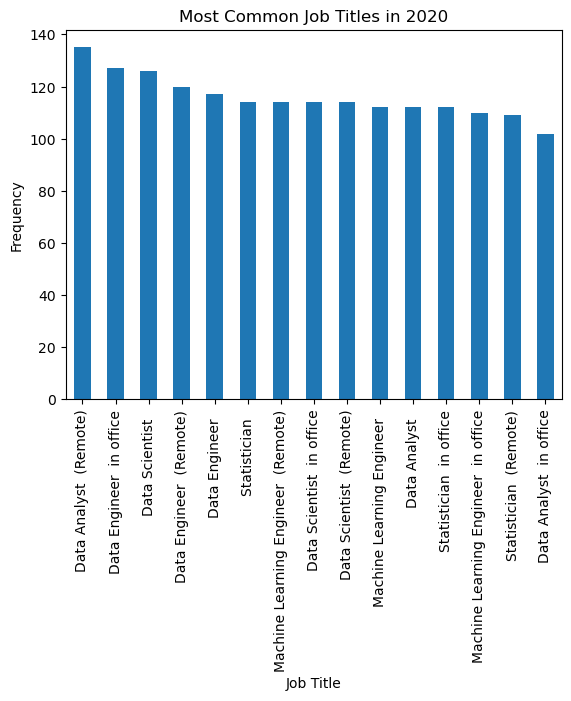

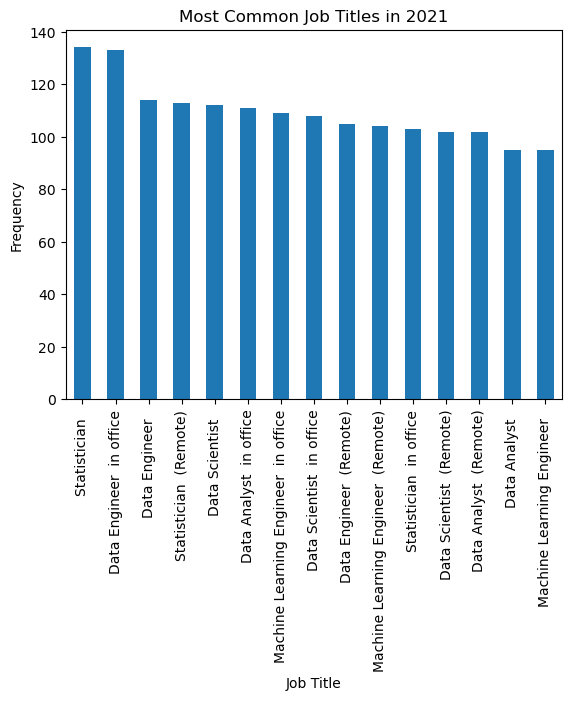

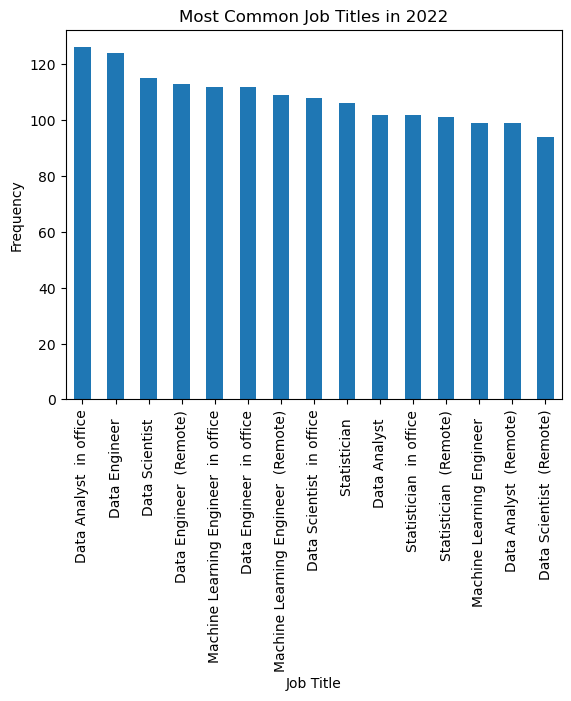

In [2]:
#Bar charts to show the most common jobs for each year
years = [2020, 2021, 2022]

most_common_per_year = {}

for year in years:
    work_year = data[data['work_year'] == year]
    most_common = work_year['job_title'].value_counts()
    most_common_per_year[year] = most_common
    
    most_common.plot(kind='bar')
    plt.title(f'Most Common Job Titles in {year}')
    plt.xlabel('Job Title')
    plt.ylabel('Frequency')
    plt.show()  

In [3]:
print('Most common Job Titles in 2020:')
print(most_common_per_year[2020].head(3))

print('Most common Job Titles in 2021:')
print(most_common_per_year[2021].head(3))

print('Most common Job Titles in 2022:')
print(most_common_per_year[2022].head(3))


Most common Job Titles in 2020:
job_title
Data Analyst  (Remote)      135
Data Engineer  in office    127
Data Scientist              126
Name: count, dtype: int64
Most common Job Titles in 2021:
job_title
Statistician                134
Data Engineer  in office    133
Data Engineer               114
Name: count, dtype: int64
Most common Job Titles in 2022:
job_title
Data Analyst  in office    126
Data Engineer              124
Data Scientist             115
Name: count, dtype: int64


In [4]:
job_counts_df = pd.DataFrame(most_common_per_year).fillna(0)
percentage_change_df = job_counts_df.pct_change(axis = 'columns') * 100
percentage_change_df = percentage_change_df.round()
percentage_change_df = percentage_change_df.fillna(0)
print(percentage_change_df)

                                      2020  2021  2022
job_title                                             
Data Analyst                           0.0 -15.0   7.0
Data Analyst  (Remote)                 0.0 -24.0  -3.0
Data Analyst  in office                0.0   9.0  14.0
Data Engineer                          0.0  -3.0   9.0
Data Engineer  (Remote)                0.0 -12.0   8.0
Data Engineer  in office               0.0   5.0 -16.0
Data Scientist                         0.0 -11.0   3.0
Data Scientist  (Remote)               0.0 -11.0  -8.0
Data Scientist  in office              0.0  -5.0   0.0
Machine Learning Engineer              0.0 -15.0   4.0
Machine Learning Engineer  (Remote)    0.0  -9.0   5.0
Machine Learning Engineer  in office   0.0  -1.0   3.0
Statistician                           0.0  18.0 -21.0
Statistician  (Remote)                 0.0   4.0 -11.0
Statistician  in office                0.0  -8.0  -1.0


### Analysis
Looking at the top jobs in the last 3 years, and their rapid percentage changes, it signifies the change 
in the market's needs. It suggests that businesess require different specialities to fully maximise their data decisions in each year.
- Data Analyst  -15.0   7.0
- Statistician   18.0   -21.0
- Data Analyst(in office)  9.0   14.0


## What-job-title-is-the-best-paid

In [5]:
mean_salaries = (data.groupby('job_title')['salary_in_usd']
                 .median()
                 .round()
                 .reset_index()
                 .sort_values(by='salary_in_usd', ascending=False))
mean_salaries

,job_title,salary_in_usd
10,Machine Learning Engineer (Remote),123566.0
12,Statistician,123246.0
0,Data Analyst,116700.0
14,Statistician in office,115898.0
2,Data Analyst in office,115839.0
4,Data Engineer (Remote),115590.0
8,Data Scientist in office,115554.0
5,Data Engineer in office,114494.0
13,Statistician (Remote),114164.0
6,Data Scientist,111119.0


### Analysis
The Machine Learning Engineer and Statistician are slightly ahead in the salary earnings, however there isn't a significant disparity overall. 
This suggests that the positional skills are nuanced and the different roles have equally valuable skills. 


## whats-the-most-popular-work-setting

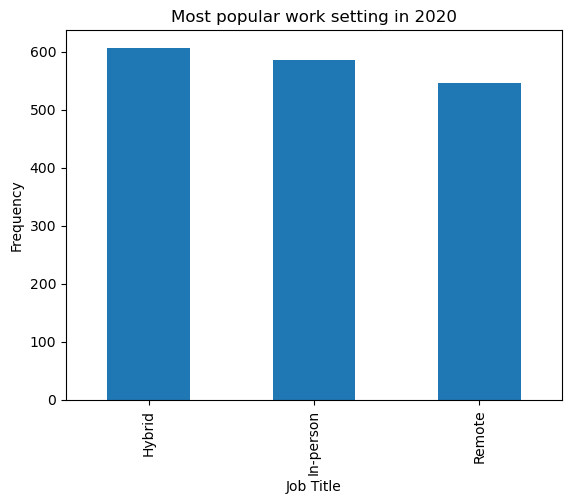

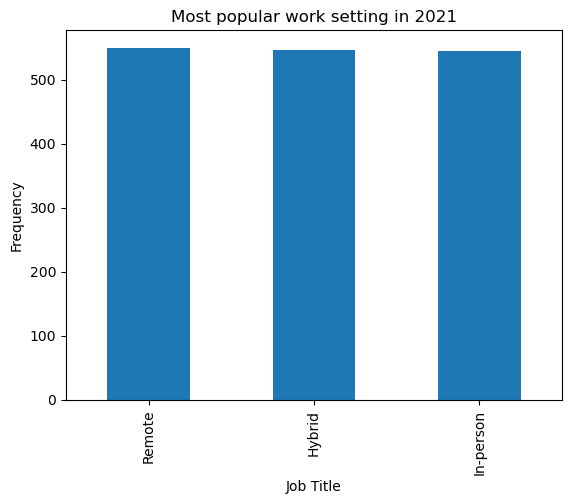

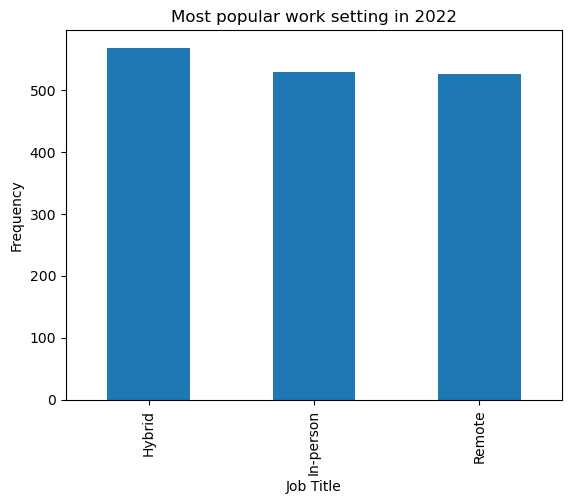

In [6]:
#Whats the most popular work setting in the UK?
years = [2020, 2021, 2022]

most_common_setting_year = {}

for year in years:
    work_year = data[data['work_year'] == year]
    most_common = work_year['work_setting'].value_counts()
    most_common_setting_year[year] = most_common
    
    most_common.plot(kind='bar')
    plt.title(f'Most popular work setting in {year}')
    plt.xlabel('Job Title')
    plt.ylabel('Frequency')
    plt.show()  

### Analysis
While the work settings are similiar in the 3 years, there are inbalances that provide information into some of the trends and needs of business in the sector.
Throughout the data range, hybrid work seems to be the most popular approach adopted by firms. The flexibility offered by the working pattern is viewed as the most effecient process for data scientist.
2021 serves as a bit of an outlier in this section, which the report believes is attributed to covid lockdowns rather than changes in the DS job market. This is reflected in the almost return to it's previous levels in 2022.

## does-company-size-affect-pay